## Creating right hand driving dataset from given left hand driving dataset for state farm

In [3]:
# import all necessary packages
import warnings 
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns

import keras
from keras.preprocessing import image
import time
import os
#from tqdm import tqdm # for progress indication

In [4]:
# initilize left and right hand image root director
#left_root_dir = 'D:/my_learning_dataset/state_farms_drivers/imgs/'
#right_root_dir = 'D:/my_learning_dataset/state_farms_drivers/imgs_right/'

left_root_dir = 'D:/my_learning_dataset/state_farms_drivers/imgs_left_cure_final/'
right_root_dir = 'D:/my_learning_dataset/state_farms_drivers/imgs_right_cure_final/'

**basic class info**

In [5]:
# this is original image dataset for left hand driving
class_list =  ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6','c7', 'c8', 'c9']
left_class_desc = ['safe driving', 'texting-right', 'talking on the phone-right', 'texting-left', 'talking on the phone-left', 
              'operating the radio', 'drinking', 'reaching behind', 'hair and makeup', 'talking to passenger']
right_class_desc = ['safe driving', 'texting-left', 'talking on the phone-left', 'texting-right', 'talking on the phone-right', 
              'operating the radio', 'drinking', 'reaching behind', 'hair and makeup', 'talking to passenger']
df_desc = pd.DataFrame({'class': class_list, 'left_desc': left_class_desc,  'right_desc': right_class_desc})
df_desc

,class,left_desc,right_desc
0,c0,safe driving,safe driving
1,c1,texting-right,texting-left
2,c2,talking on the phone-right,talking on the phone-left
3,c3,texting-left,texting-right
4,c4,talking on the phone-left,talking on the phone-right
5,c5,operating the radio,operating the radio
6,c6,drinking,drinking
7,c7,reaching behind,reaching behind
8,c8,hair and makeup,hair and makeup
9,c9,talking to passenger,talking to passenger


In [8]:
left_train_dir = os.path.join(left_root_dir, 'train')
left_test_dir = os.path.join(left_root_dir, 'test')

right_train_dir = os.path.join(right_root_dir, 'train')
right_test_dir = os.path.join(right_root_dir, 'test')

In [12]:
# left: dataset summary
class_dirs = os.listdir(left_train_dir)
for classname in class_dirs:
    print('{}: {} images'.format(classname, len(os.listdir(os.path.join(left_train_dir, classname)))))

c0: 1472 images
c1: 1528 images
c2: 1527 images
c3: 1556 images
c4: 1587 images
c5: 1607 images
c6: 1529 images
c7: 1617 images
c8: 1489 images
c9: 1110 images


In [13]:
# create all necessary directory for right hand driving dataset
if not os.path.exists(right_root_dir):
    os.mkdir(right_root_dir)

if not os.path.exists(right_train_dir):
    os.mkdir(right_train_dir)
    
if not os.path.exists(right_test_dir):
    os.mkdir(right_test_dir)    
    
for classname in class_dirs:
    class_dir = os.path.join(right_train_dir, classname)
    if not os.path.exists(class_dir):
        os.mkdir(class_dir)

In [14]:
import PIL

def flip_image(in_img_path, out_img_path):
    """
    Flip or mirror the image 
    @param in_img: source image file to flip
    @param out_img: Path to save the flip image file
    """
    image_obj = PIL.Image.open(in_img_path)
    flip_image = image_obj.transpose(PIL.Image.FLIP_LEFT_RIGHT)
    flip_image.save(out_img_path)
    return

In [15]:
# flip/mirror: create train dataset for right hand driving
for classname in class_dirs:
    src_class_imgs = os.listdir(os.path.join(left_train_dir, classname))
    for file in src_class_imgs:
        src = '{}/{}/{}'.format(left_train_dir, classname, file)
        dst = '{}/{}/{}'.format(right_train_dir, classname, file)
        if not os.path.exists(dst):
            flip_image(src,dst)
                             
    dst_class_images = os.listdir(os.path.join(right_train_dir, classname))
    print("class: {}, {} images created..".format(classname, len(dst_class_images)))

class: c0, 1472 images created..
class: c1, 1528 images created..
class: c2, 1527 images created..
class: c3, 1556 images created..
class: c4, 1587 images created..
class: c5, 1607 images created..
class: c6, 1529 images created..
class: c7, 1617 images created..
class: c8, 1489 images created..
class: c9, 1110 images created..


In [16]:
# right: dataset summary
print("right: dataset summary")
class_dirs = os.listdir(right_train_dir)
for classname in class_dirs:
    print('{}: {} images'.format(classname, len(os.listdir(os.path.join(right_train_dir, classname)))))

right: dataset summary
c0: 1472 images
c1: 1528 images
c2: 1527 images
c3: 1556 images
c4: 1587 images
c5: 1607 images
c6: 1529 images
c7: 1617 images
c8: 1489 images
c9: 1110 images


***visualizing left and right hand images***

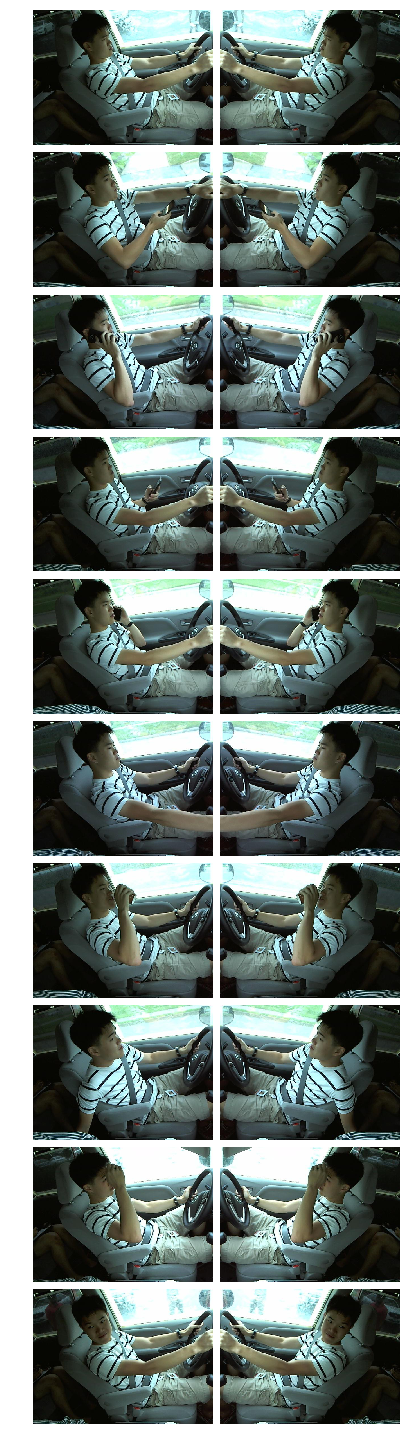

In [17]:
from mpl_toolkits.axes_grid1 import ImageGrid

num_row, num_col = 10, 2
fig = plt.figure(1, figsize=(26, 26))
grid = ImageGrid(fig, 111, nrows_ncols=(num_row, num_col), axes_pad=0.1)
i = 0
for class_id, classname in enumerate(class_dirs):
    src_class_imgs = os.listdir(os.path.join(left_train_dir, classname))
    file = src_class_imgs[1]
    src = '{}/{}/{}'.format(left_train_dir, classname, file)
    dst = '{}/{}/{}'.format(right_train_dir, classname, file)
    
    ax = grid[i]
    inp_image = image.load_img(src)
    ax.imshow(inp_image)
    ax.axis('off')
    i += 1
    
    ax = grid[i]
    mirror_img = image.load_img(dst)
    ax.imshow(mirror_img)
    ax.axis('off')
    i += 1
    
#fig.savefig('eda/right_samples.png', dpi=300)
plt.show();

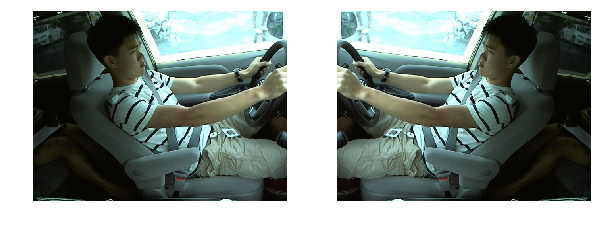

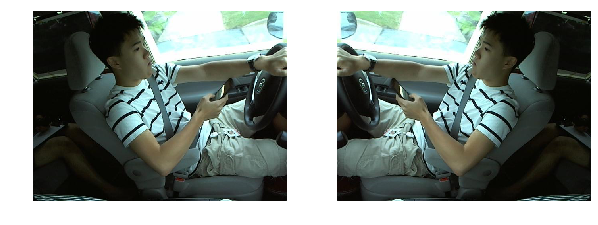

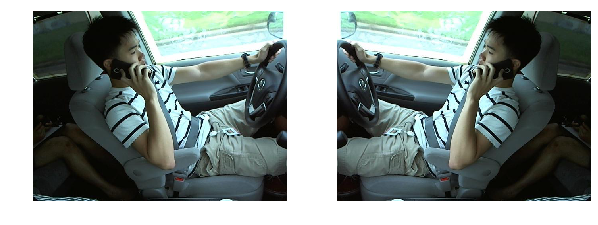

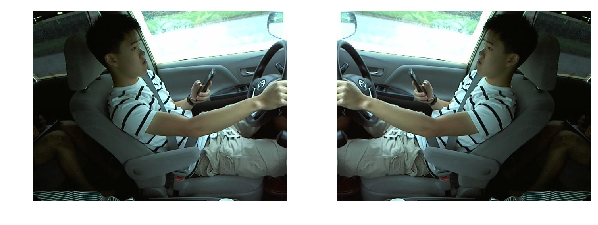

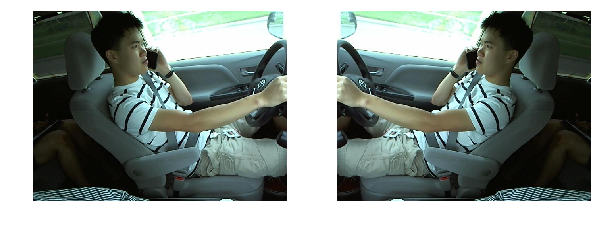

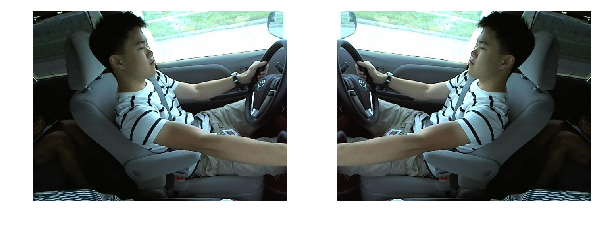

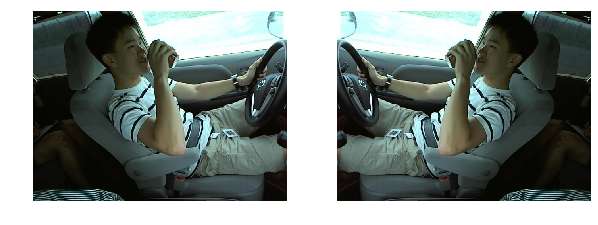

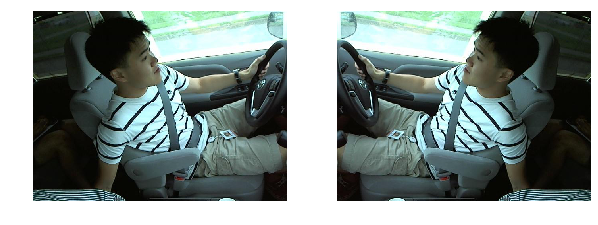

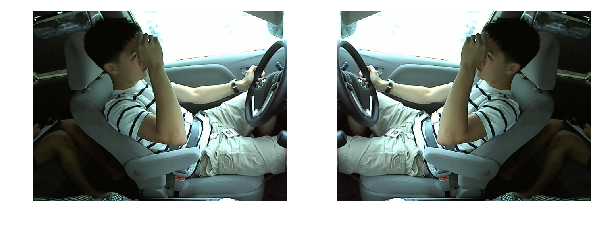

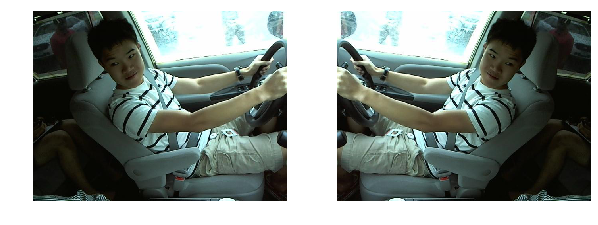

In [18]:
# flip/mirror: create train dataset for right hand driving
for classname in class_dirs:
    src_class_imgs = os.listdir(os.path.join(left_train_dir, classname))
    file = src_class_imgs[1]
    src = '{}/{}/{}'.format(left_train_dir, classname, file)
    dst = '{}/{}/{}'.format(right_train_dir, classname, file)
    
    fig, axs = plt.subplots(1,2,figsize=(10,10))

    inp_image = image.load_img(src)
    axs[0].imshow(inp_image)
    axs[0].axis('off')

    mirror_img = image.load_img(dst)
    axs[1].imshow(mirror_img)
    axs[1].axis('off')
    plt.show()        